# INF-616 - Tarefa 2

Professor: Alexandre Ferreira -- melloferreira@ic.unicamp.br  
Monitor: Lucas David -- ra188972@students.ic.unicamp.br

Instituto de Computação - Unicamp  
2018

## Classificação multi-classe

In [1]:
from __future__ import print_function

import numpy as np
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

samples in train: 449
samples in test: 899
features: 64
classes: 10

Some of the samples in digits:


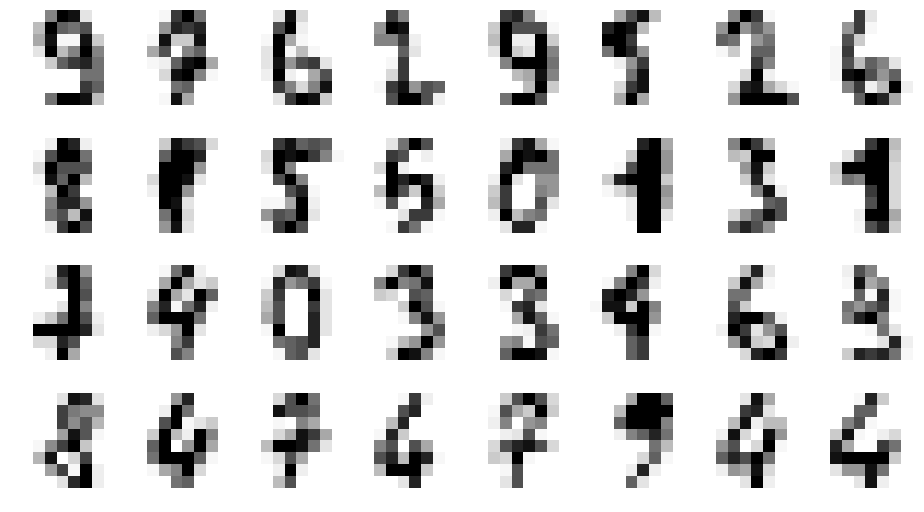

In [2]:
x, y = datasets.load_digits(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=.5)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train,
                                                      test_size=1 / 2)
print('samples in train: %i' % x_train.shape[0],
      'samples in test: %i' % x_test.shape[0],
      'features: %i' % x_train.shape[1],
      'classes: %i' % (np.max(y_train) + 1),
      sep='\n', end='\n\n')
print('Some of the samples in digits:')
_ = plt.figure(figsize=(16, 9))
for ix in range(4  * 8):
    plt.subplot(4, 8, ix + 1)
    plt.imshow(x_train[ix].reshape(8, 8), cmap='Greys')
    plt.axis('off')

**Teste múltiplos *hiper-parâmetros* e otimize um modelo a fim de corretamente classificar as amostras no primeiro conjunto de validação de dígitos**

In [3]:
# from ... import ...
from sklearn import svm

trials = [{'C': 1e-3, 'kernel': 'rbf'},
          {'C': 1e-2, 'kernel': 'rbf'},
          {'C': 1e-1, 'kernel': 'rbf'},
          {'C': 1e0, 'kernel': 'rbf'},
          {'C': 1e1, 'kernel': 'rbf'},
          {'C': 1e2, 'kernel': 'rbf'},
          {'C': 1e3, 'kernel': 'rbf'},
          {'C': 1e-3, 'kernel': 'linear'},
          {'C': 1e-2, 'kernel': 'linear'},
          {'C': 1e-1, 'kernel': 'linear'},
          {'C': 1e0, 'kernel': 'linear'},
          {'C': 1e1, 'kernel': 'linear'},
          {'C': 1e2, 'kernel': 'linear'},
          {'C': 1e3, 'kernel': 'linear'}
         ]

# metric = ...
metric = metrics.accuracy_score

def find_best_params(trials, metric, train, valid):
    scores = []
    for params in trials:
        # model = ...
        model = svm.SVC(**params)
        # model.fit(...)
        model.fit(train[0],train[1])
        # score = metric(actual, predicted)
        pred = model.predict(valid[0])
        score = metric(valid[1], pred)
        scores.append(score)
    return scores

scores = find_best_params(trials, metric, (x_train, y_train), (x_valid, y_valid))
best_ix = np.argmax(scores)
best_params = trials[best_ix]

print('best parameters are', best_params, 'with score', scores[best_ix])

best parameters are {'C': 0.01, 'kernel': 'linear'} with score 0.9643652561247216


**Este modelo manteve a pontuação sobre o conjunto de teste?**

In [4]:
#Aplicando o melhor modelo anterior ao conjunto de teste
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

clf = svm.SVC(C=0.01, kernel='linear')
y_pred = clf.fit(x_train, y_train).predict(x_test)
print('Acurácia:', accuracy_score(y_test, y_pred))
print('\nMatriz de confusão: \n', confusion_matrix(y_test, y_pred))
print('\n', classification_report(y_test, y_pred))


#Descobrindo os melhores parâmetros para o teste
scores = find_best_params(trials, metric, (x_train, y_train), (x_test,y_test))
best_ix = np.argmax(scores)
best_params = trials[best_ix]

print('best parameters are', best_params, 'with score', scores[best_ix])

Acurácia: 0.9599555061179088

Matriz de confusão: 
 [[82  0  0  0  0  0  0  0  0  0]
 [ 0 89  0  0  0  0  0  0  0  0]
 [ 0  0 83  0  0  0  0  0  0  0]
 [ 0  0  0 86  0  1  0  2  4  0]
 [ 0  1  0  0 92  0  0  0  0  0]
 [ 0  0  0  0  0 95  1  1  0  2]
 [ 0  0  0  0  1  1 95  0  1  0]
 [ 0  0  0  0  0  0  0 87  0  0]
 [ 0  3  0  0  2  1  0  1 75  1]
 [ 1  1  0  1  0  1  0  7  2 79]]

              precision    recall  f1-score   support

          0       0.99      1.00      0.99        82
          1       0.95      1.00      0.97        89
          2       1.00      1.00      1.00        83
          3       0.99      0.92      0.96        93
          4       0.97      0.99      0.98        93
          5       0.96      0.96      0.96        99
          6       0.99      0.97      0.98        98
          7       0.89      1.00      0.94        87
          8       0.91      0.90      0.91        83
          9       0.96      0.86      0.91        92

avg / total       0.96      0.

**Sub-dividir conjuntos já pequenos é quase sempre inviável. Treine sobre `(x_small_train, y_small_train)` e reporte sua métrica sobre o conjunto de teste:**

In [5]:
x_small_all, _, y_small_all, _ = train_test_split(x_train, y_train, test_size=.9)
x_small_train, x_small_valid, y_small_train, y_small_valid = train_test_split(
    x_small_all, y_small_all, test_size=.5)
print('samples in reduced train:', x_small_train.shape[0])

samples in reduced train: 22


In [6]:
#Encontrando os melhores parametros com SMALL train
scores = find_best_params(trials, metric, (x_small_train, y_small_train), (x_small_valid,y_small_valid))
best_ix = np.argmax(scores)
best_params = trials[best_ix]

print('best parameters are', best_params, 'with score', scores[best_ix])

best parameters are {'C': 0.01, 'kernel': 'linear'} with score 0.6818181818181818


In [9]:
#Aplicando o melhor modelo anterior ao conjunto de teste
clf = svm.SVC(C=0.01, kernel='linear')
y_pred = clf.fit(x_small_train, y_small_train).predict(x_test)
print('Acurácia:', accuracy_score(y_test, y_pred))
print('\nMatriz de confusão: \n', confusion_matrix(y_test, y_pred))
print('\n', classification_report(y_test, y_pred))

Acurácia: 0.7096774193548387

Matriz de confusão: 
 [[82  0  0  0  0  0  0  0  0  0]
 [ 0 87  1  0  0  0  1  0  0  0]
 [ 0 12 69  0  0  0  0  0  2  0]
 [ 0  9  7 67  0  0  0  6  2  2]
 [ 2 13  0  0 70  0  8  0  0  0]
 [ 2  2  6 10  4 67  0  0  6  2]
 [ 6  0  0  0  0  0 78  0 14  0]
 [ 0  2  0  0 27  0  0 57  1  0]
 [ 0 22  9  1  4  1  0  0 38  8]
 [ 0  5  0 45 11  3  0  0  5 23]]

              precision    recall  f1-score   support

          0       0.89      1.00      0.94        82
          1       0.57      0.98      0.72        89
          2       0.75      0.83      0.79        83
          3       0.54      0.72      0.62        93
          4       0.60      0.75      0.67        93
          5       0.94      0.68      0.79        99
          6       0.90      0.80      0.84        98
          7       0.90      0.66      0.76        87
          8       0.56      0.46      0.50        83
          9       0.66      0.25      0.36        92

avg / total       0.73      0.

**Utilize *cross-validation* e verifique a acurácia em teste.**

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

folds = 3

# search best parameters...
# evaluate over test set...

# Um outro jeito, em uma única linha, é usar a classe GridSearchCV:
metric = 'accuracy'
parameters = {
    'C': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    'kernel': ['rbf', 'linear']
}
model = svm.SVC()
grid = GridSearchCV(model, parameters,
                    scoring=metric,
                    cv=folds,
                    verbose=1,
                    n_jobs=4)
grid.fit(x, y)
print('melhores parâmetros:', grid.best_params_)
print('melhor métrica avaliada:', grid.best_score_)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=4)]: Done  42 out of  42 | elapsed:    6.6s finished


melhores parâmetros: {'C': 0.001, 'kernel': 'linear'}
melhor métrica avaliada: 0.9515859766277128
